## Simulation
Simulation of the system by recursively calling the discrete time dynamics functions with constant velocity (both translational and rotational). This means we will make a circle at a certain speed.

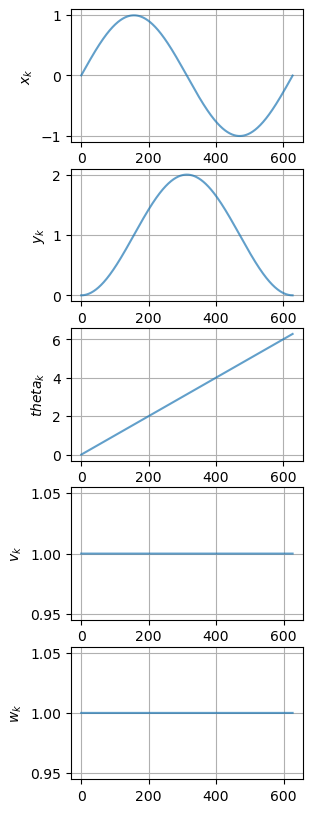

[-3.18527923e-03 -9.26073555e-06  6.28000000e+00]
3.141592653589793


In [3]:
import sys
sys.path.append("..")

from model import *
import matplotlib.pyplot as plt
import numpy as np

PARAMS={
    'dt': 0.01,
    'integration_steps': 10
}

model = DifferentialDrive(PARAMS)
N = int(ca.floor((2*ca.pi)/PARAMS['dt'])) # number of steps (enough to do a full turn)
state_traj  = np.zeros((model.state_len, N+1)) # preallocate array for the state trajectory
input_traj  = np.ones((model.input_len, N)) # define (constant) action trajectory
NUMBER_OF_TURNS = 1
input_traj[0,:] *= 1 # translational velocity
input_traj[1,:] *= NUMBER_OF_TURNS # rotational velocity (factor is number of turns)

# initial state
state_traj[:, 0]  = np.array([0., 0., 0.])

# forward simulation
for k in range(N):
    state_k = state_traj[:, k]
    input_k = input_traj[:, k]
    state_traj[:, [k+1]] = model.step(state_k,input_k)
    
plot_trajectory(state_traj, input_traj, state_labels=['x','y','theta'], input_labels=['v','w'])
plt.show()
print(state_traj[:,-1])
print(ca.pi * NUMBER_OF_TURNS)